<a href="https://colab.research.google.com/github/SaddamHasanov/credit-card-fraud-detection-model/blob/main/credit_card_fraud_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Data Preprocessing

In [ ]:
raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSets/Credit-Card-Fraud-Detection-DataSet/application_data.csv')

In [ ]:
raw_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_description = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSets/Credit-Card-Fraud-Detection-DataSet/columns_description.csv', encoding = 'latin1')

In [ ]:
data_description

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
155,209,previous_application.csv,DAYS_FIRST_DUE,Relative to application date of current applic...,time only relative to the application
156,210,previous_application.csv,DAYS_LAST_DUE_1ST_VERSION,Relative to application date of current applic...,time only relative to the application
157,211,previous_application.csv,DAYS_LAST_DUE,Relative to application date of current applic...,time only relative to the application
158,212,previous_application.csv,DAYS_TERMINATION,Relative to application date of current applic...,time only relative to the application


In [ ]:
raw_data.shape

(307511, 122)

In [ ]:
raw_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [ ]:
raw_data.duplicated().sum()

0

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
raw_data_columns = raw_data.columns
raw_data_columns = list(raw_data_columns)

columns = []

with open('columns_names.txt', 'w') as f:
  for column in raw_data_columns:
    values = f'{column}: {raw_data[column].isnull().sum()}, {raw_data[column].dtype}'
    columns.append(values)
    f.write(values + '\n')

In [ ]:
columns

['SK_ID_CURR: 0, int64',
 'TARGET: 0, int64',
 'NAME_CONTRACT_TYPE: 0, object',
 'CODE_GENDER: 0, object',
 'FLAG_OWN_CAR: 0, object',
 'FLAG_OWN_REALTY: 0, object',
 'CNT_CHILDREN: 0, int64',
 'AMT_INCOME_TOTAL: 0, float64',
 'AMT_CREDIT: 0, float64',
 'AMT_ANNUITY: 12, float64',
 'AMT_GOODS_PRICE: 278, float64',
 'NAME_TYPE_SUITE: 1292, object',
 'NAME_INCOME_TYPE: 0, object',
 'NAME_EDUCATION_TYPE: 0, object',
 'NAME_FAMILY_STATUS: 0, object',
 'NAME_HOUSING_TYPE: 0, object',
 'REGION_POPULATION_RELATIVE: 0, float64',
 'DAYS_BIRTH: 0, int64',
 'DAYS_EMPLOYED: 0, int64',
 'DAYS_REGISTRATION: 0, float64',
 'DAYS_ID_PUBLISH: 0, int64',
 'OWN_CAR_AGE: 202929, float64',
 'FLAG_MOBIL: 0, int64',
 'FLAG_EMP_PHONE: 0, int64',
 'FLAG_WORK_PHONE: 0, int64',
 'FLAG_CONT_MOBILE: 0, int64',
 'FLAG_PHONE: 0, int64',
 'FLAG_EMAIL: 0, int64',
 'OCCUPATION_TYPE: 96391, object',
 'CNT_FAM_MEMBERS: 2, float64',
 'REGION_RATING_CLIENT: 0, int64',
 'REGION_RATING_CLIENT_W_CITY: 0, int64',
 'WEEKDAY_APPR

# Exploratory Data Analysis

In [ ]:
correlation = []

with open('correlation.txt', 'w') as f:
  for column in raw_data_columns:
    if raw_data[column].dtype == 'int64' or raw_data[column].dtype == 'float64':
      values = f"{column}: {raw_data[column].corr(raw_data['TARGET'])}"
      correlation.append(f"{column}: {raw_data[column].corr(raw_data['TARGET'])}")
      f.write(values + '\n')

In [ ]:
correlation

['SK_ID_CURR: -0.0021084690181977185',
 'TARGET: 1.0',
 'CNT_CHILDREN: 0.019187133596269994',
 'AMT_INCOME_TOTAL: -0.003981865601205662',
 'AMT_CREDIT: -0.03036928646142965',
 'AMT_ANNUITY: -0.01281656151541364',
 'AMT_GOODS_PRICE: -0.039645281169544085',
 'REGION_POPULATION_RELATIVE: -0.03722714854244522',
 'DAYS_BIRTH: 0.07823930830982694',
 'DAYS_EMPLOYED: -0.044931662657738715',
 'DAYS_REGISTRATION: 0.04197486283141716',
 'DAYS_ID_PUBLISH: 0.05145717260705743',
 'OWN_CAR_AGE: 0.03761156427516558',
 'FLAG_MOBIL: 0.0005343955790282575',
 'FLAG_EMP_PHONE: 0.04598221971659251',
 'FLAG_WORK_PHONE: 0.028524322363217502',
 'FLAG_CONT_MOBILE: 0.000370126802348927',
 'FLAG_PHONE: -0.023806272330357287',
 'FLAG_EMAIL: -0.0017583834312546065',
 'CNT_FAM_MEMBERS: 0.00930778439653112',
 'REGION_RATING_CLIENT: 0.05889901494571238',
 'REGION_RATING_CLIENT_W_CITY: 0.060892667564823415',
 'HOUR_APPR_PROCESS_START: -0.024165831430094382',
 'REG_REGION_NOT_LIVE_REGION: 0.005575944520908466',
 'REG_RE

In [ ]:
sorted(correlation, key = lambda x: x.split(':')[1], reverse = True)

['TARGET: 1.0',
 'DAYS_BIRTH: 0.07823930830982694',
 'REGION_RATING_CLIENT_W_CITY: 0.060892667564823415',
 'REGION_RATING_CLIENT: 0.05889901494571238',
 'DAYS_LAST_PHONE_CHANGE: 0.05521848351345971',
 'DAYS_ID_PUBLISH: 0.05145717260705743',
 'REG_CITY_NOT_WORK_CITY: 0.05099446436812667',
 'FLAG_EMP_PHONE: 0.04598221971659251',
 'REG_CITY_NOT_LIVE_CITY: 0.04439537480570111',
 'FLAG_DOCUMENT_3: 0.044346346851144865',
 'DAYS_REGISTRATION: 0.04197486283141716',
 'OWN_CAR_AGE: 0.03761156427516558',
 'LIVE_CITY_NOT_WORK_CITY: 0.0325183411014988',
 'DEF_30_CNT_SOCIAL_CIRCLE: 0.03224757925304431',
 'DEF_60_CNT_SOCIAL_CIRCLE: 0.03127647212643636',
 'FLAG_WORK_PHONE: 0.028524322363217502',
 'AMT_REQ_CREDIT_BUREAU_YEAR: 0.019929858569466677',
 'CNT_CHILDREN: 0.019187133596269994',
 'CNT_FAM_MEMBERS: 0.00930778439653112',
 'OBS_30_CNT_SOCIAL_CIRCLE: 0.00913066570277639',
 'OBS_60_CNT_SOCIAL_CIRCLE: 0.009022143630214871',
 'REG_REGION_NOT_WORK_REGION: 0.006941907545371621',
 'REG_REGION_NOT_LIVE_RE

I try to analyze relation between 'TARGET' column and the other categorical columns using barplots

<Axes: xlabel='TARGET'>

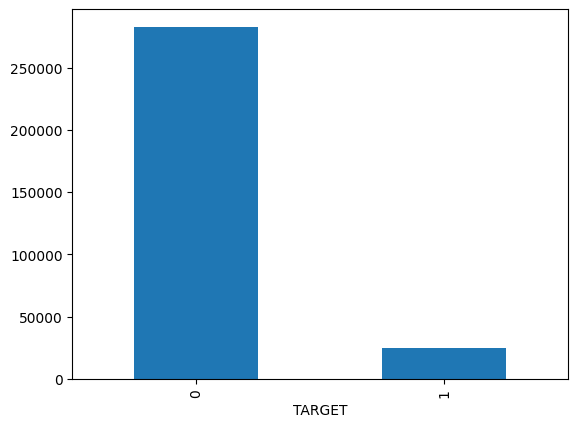

In [ ]:
raw_data['TARGET'].value_counts().plot(kind = 'bar')
# Our Data is skewed!

<Axes: xlabel='NAME_CONTRACT_TYPE'>

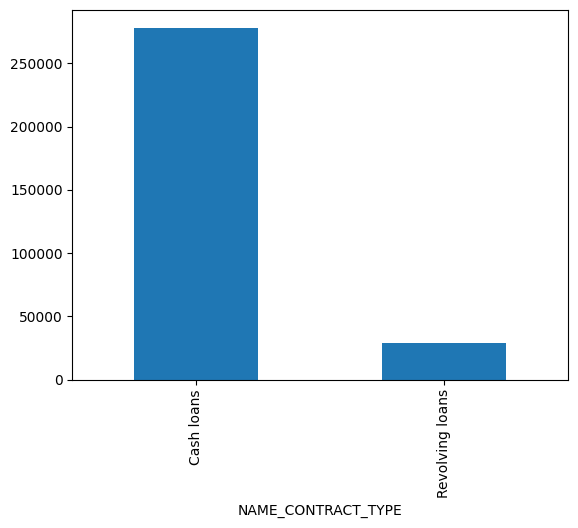

In [ ]:
raw_data['NAME_CONTRACT_TYPE'].value_counts().plot(kind = 'bar')

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='TARGET'>

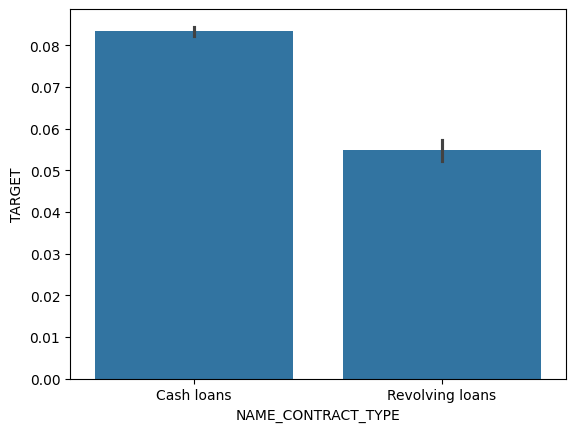

In [ ]:
sns.barplot(x = raw_data['NAME_CONTRACT_TYPE'], y = raw_data['TARGET'])
# That means those who are taking Cash Loans have more chances to do fraud!

<Axes: xlabel='CODE_GENDER'>

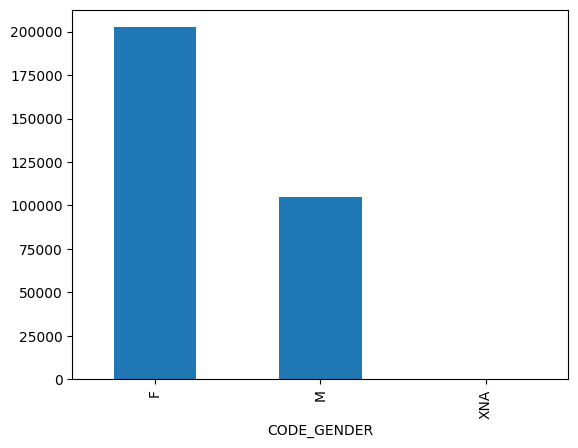

In [ ]:
raw_data['CODE_GENDER'].value_counts().plot(kind = 'bar')

<Axes: xlabel='CODE_GENDER', ylabel='TARGET'>

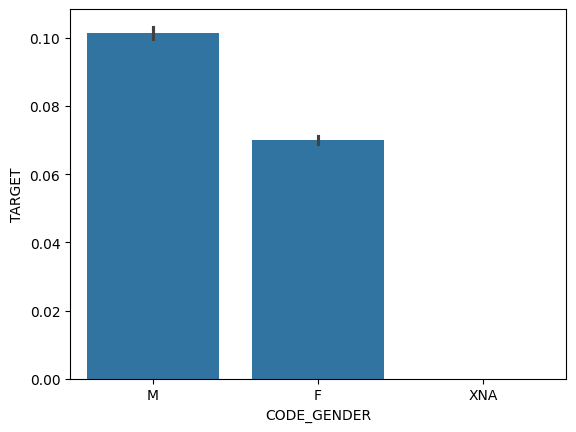

In [ ]:
sns.barplot(x = raw_data['CODE_GENDER'], y = raw_data['TARGET'])

<Axes: xlabel='FLAG_OWN_CAR'>

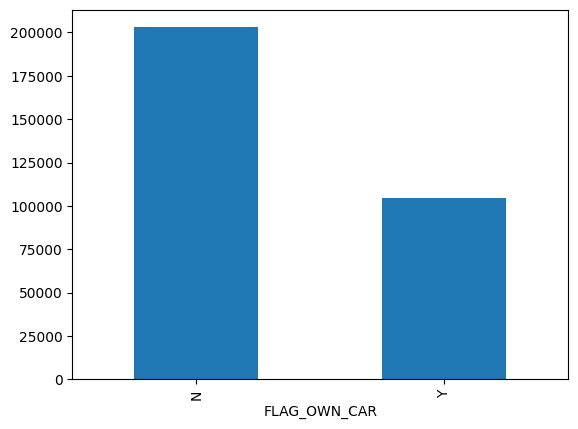

In [ ]:
raw_data['FLAG_OWN_CAR'].value_counts().plot(kind = 'bar')

<Axes: xlabel='FLAG_OWN_CAR', ylabel='TARGET'>

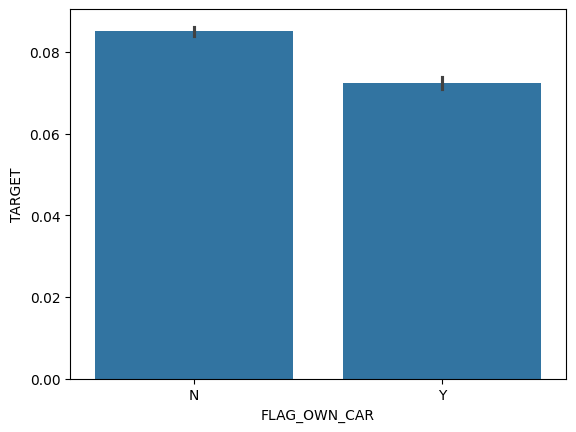

In [ ]:
sns.barplot(x = raw_data['FLAG_OWN_CAR'], y = raw_data['TARGET'])

<Axes: xlabel='FLAG_OWN_REALTY'>

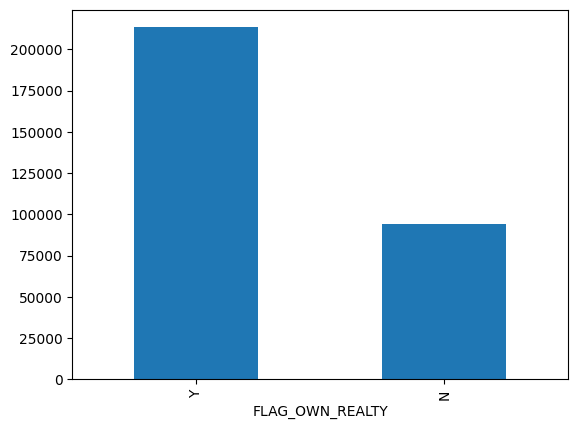

In [ ]:
raw_data['FLAG_OWN_REALTY'].value_counts().plot(kind = 'bar')

<Axes: xlabel='FLAG_OWN_REALTY', ylabel='TARGET'>

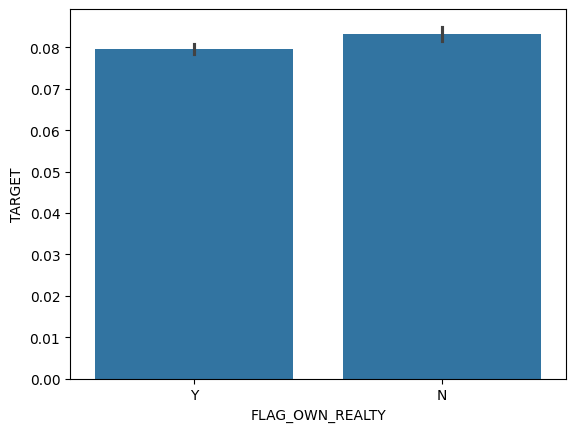

In [ ]:
sns.barplot(x = raw_data['FLAG_OWN_REALTY'], y = raw_data['TARGET'])

In [ ]:
raw_data['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

<Axes: xlabel='NAME_EDUCATION_TYPE'>

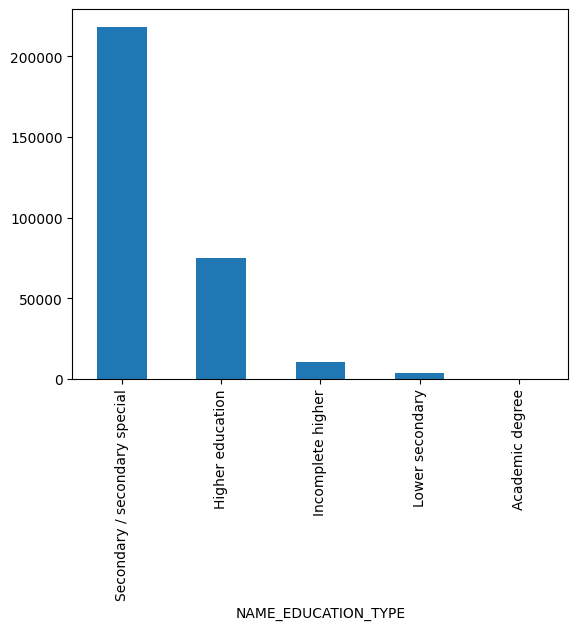

In [ ]:
raw_data['NAME_EDUCATION_TYPE'].value_counts().plot(kind = 'bar')

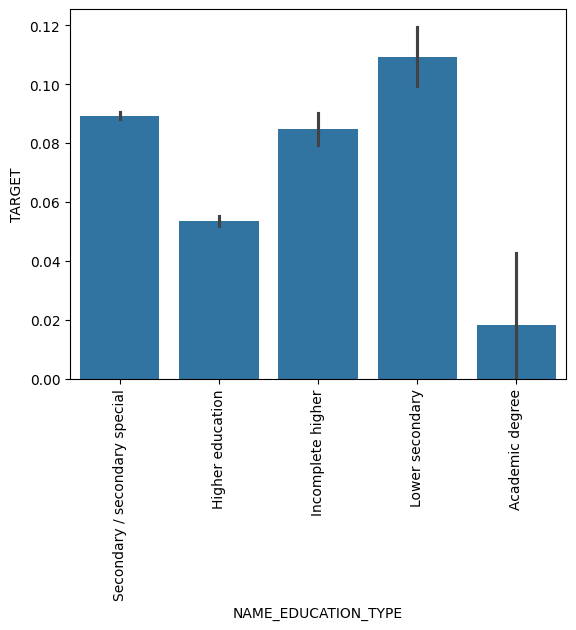

In [ ]:
sns.barplot(x = raw_data['NAME_EDUCATION_TYPE'], y = raw_data['TARGET'])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
raw_data['FLAG_MOBIL'].value_counts()

FLAG_MOBIL
1    307510
0         1
Name: count, dtype: int64

In [ ]:
raw_data['FLAG_EMAIL'].value_counts()

FLAG_EMAIL
0    290069
1     17442
Name: count, dtype: int64

<Axes: xlabel='FLAG_EMAIL', ylabel='TARGET'>

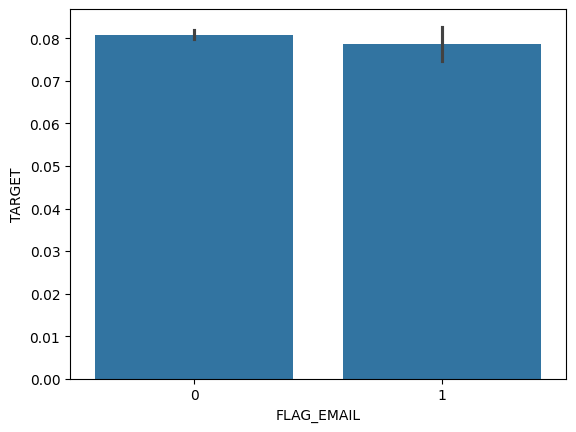

In [ ]:
sns.barplot(x = raw_data['FLAG_EMAIL'], y = raw_data['TARGET'])

In [ ]:
raw_data['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

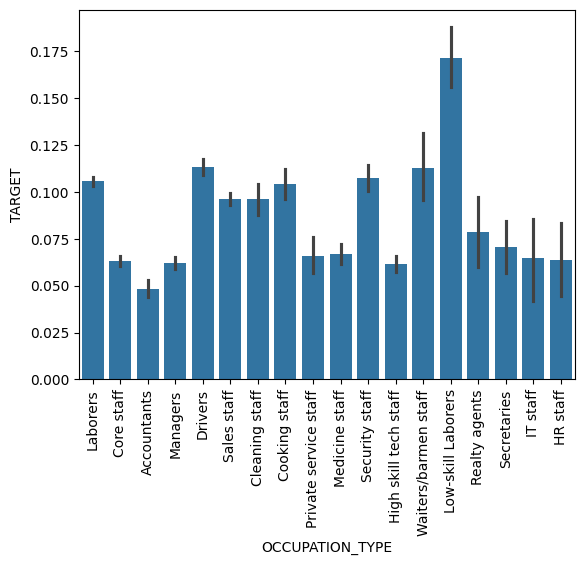

In [ ]:
sns.barplot(x = raw_data['OCCUPATION_TYPE'], y = raw_data['TARGET'])
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='REGION_RATING_CLIENT'>

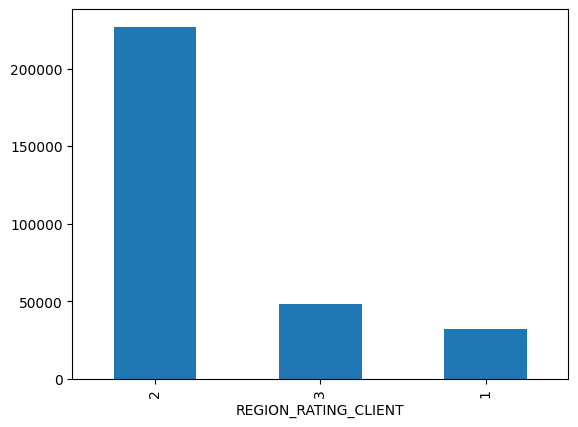

In [ ]:
raw_data['REGION_RATING_CLIENT'].value_counts().plot(kind='bar')

<Axes: xlabel='REGION_RATING_CLIENT', ylabel='TARGET'>

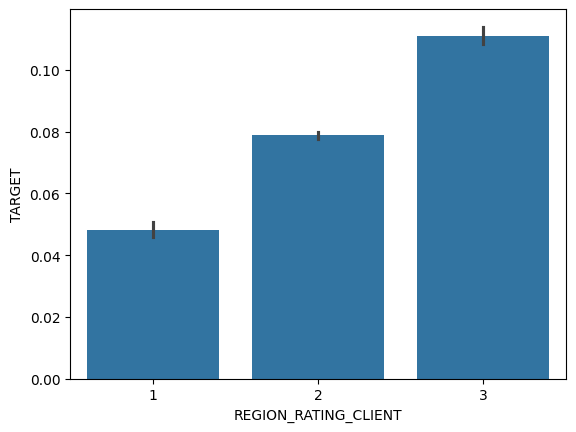

In [ ]:
sns.barplot(x = raw_data['REGION_RATING_CLIENT'], y = raw_data['TARGET'])

In [ ]:
raw_data['REG_REGION_NOT_WORK_REGION'].value_counts()
# True if client's permanent address does not match work address

REG_REGION_NOT_WORK_REGION
0    291899
1     15612
Name: count, dtype: int64

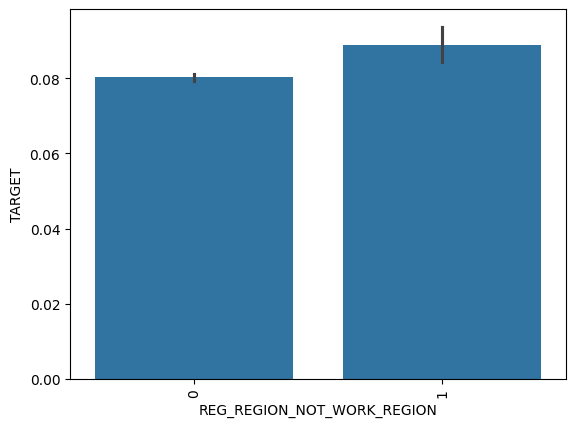

In [ ]:
sns.barplot(x = raw_data['REG_REGION_NOT_WORK_REGION'], y = raw_data['TARGET'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
raw_data['DAYS_LAST_PHONE_CHANGE'].value_counts().head(25)
# How many days before application did client change phone?

DAYS_LAST_PHONE_CHANGE
 0.0      37672
-1.0       2812
-2.0       2318
-3.0       1763
-4.0       1285
-5.0        824
-6.0        537
-7.0        442
-8.0        278
-476.0      222
-352.0      213
-392.0      211
-364.0      209
-479.0      204
-358.0      203
-329.0      203
-293.0      202
-350.0      201
-441.0      200
-399.0      200
-404.0      199
-9.0        198
-463.0      198
-11.0       198
-301.0      197
Name: count, dtype: int64

In [ ]:
raw_data['DAYS_LAST_PHONE_CHANGE'].corr(raw_data['TARGET'])

0.05521848351345971

In [ ]:
raw_data['CNT_FAM_MEMBERS'].value_counts()

CNT_FAM_MEMBERS
2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: count, dtype: int64

In [ ]:
raw_data['CNT_FAM_MEMBERS'].corr(raw_data['TARGET'])

0.00930778439653112

<Axes: xlabel='CNT_FAM_MEMBERS', ylabel='TARGET'>

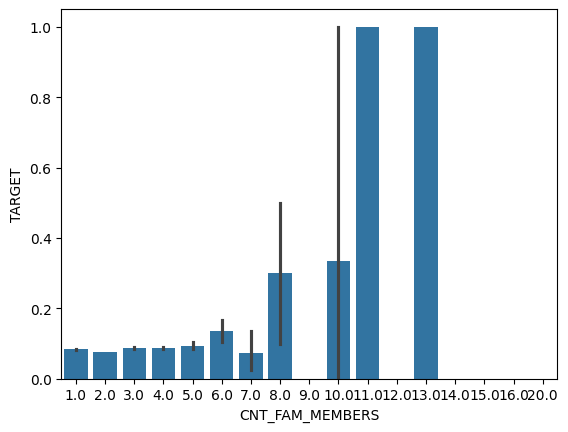

In [ ]:
sns.barplot(x = raw_data['CNT_FAM_MEMBERS'], y = raw_data['TARGET'])

Analysing non-categorical (numerical) columns

In [ ]:
raw_data['AMT_INCOME_TOTAL']
# This column indicates total income of every client

0         202500.0
1         270000.0
2          67500.0
3         135000.0
4         121500.0
            ...   
307506    157500.0
307507     72000.0
307508    153000.0
307509    171000.0
307510    157500.0
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: float64

<Axes: ylabel='AMT_INCOME_TOTAL'>

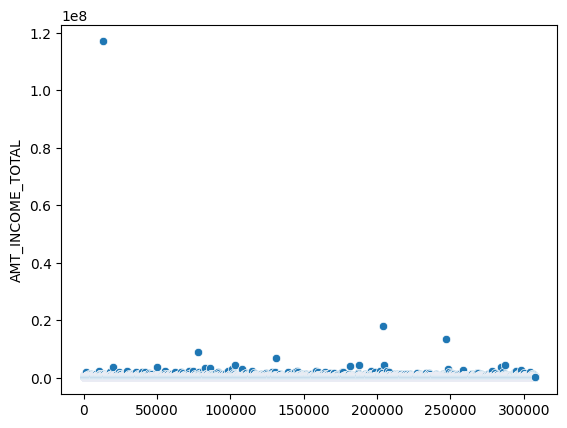

In [ ]:
sns.scatterplot(raw_data['AMT_INCOME_TOTAL'])
# As you can see there is an outlier

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='TARGET'>

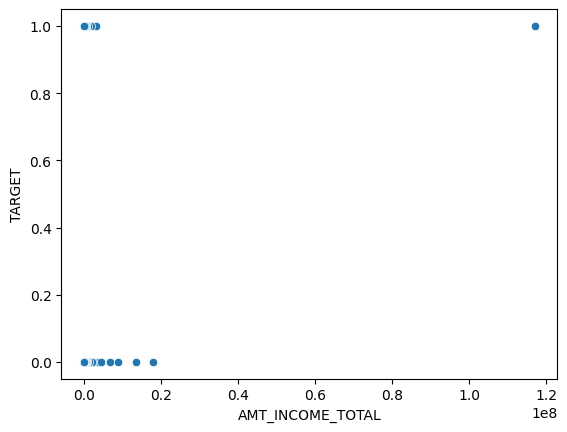

In [ ]:
sns.scatterplot(x = raw_data['AMT_INCOME_TOTAL'], y = raw_data['TARGET'])

In [ ]:
raw_data['AMT_INCOME_TOTAL'].corr(raw_data['TARGET'])

-0.003981865601205662

In [ ]:
raw_data['AMT_INCOME_TOTAL'].mean()

168797.9192969845

In [ ]:
raw_data['AMT_INCOME_TOTAL'].max()

117000000.0

In [ ]:
raw_data['AMT_INCOME_TOTAL'].min()

25650.0

In [ ]:
raw_data['AMT_INCOME_TOTAL'].median()

147150.0

In [ ]:
raw_data['AMT_CREDIT']

0          406597.5
1         1293502.5
2          135000.0
3          312682.5
4          513000.0
            ...    
307506     254700.0
307507     269550.0
307508     677664.0
307509     370107.0
307510     675000.0
Name: AMT_CREDIT, Length: 307511, dtype: float64

<Axes: ylabel='AMT_CREDIT'>

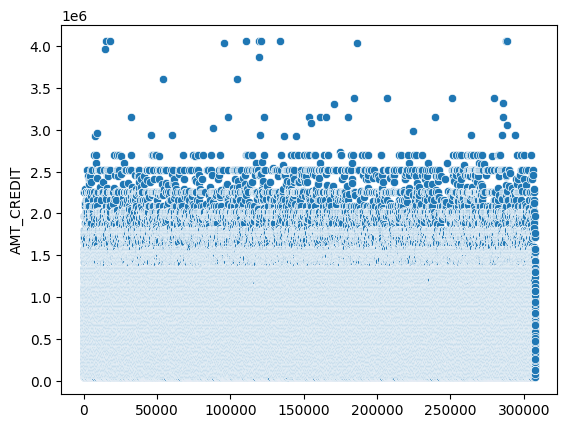

In [ ]:
sns.scatterplot(raw_data['AMT_CREDIT'])

<Axes: xlabel='AMT_CREDIT', ylabel='TARGET'>

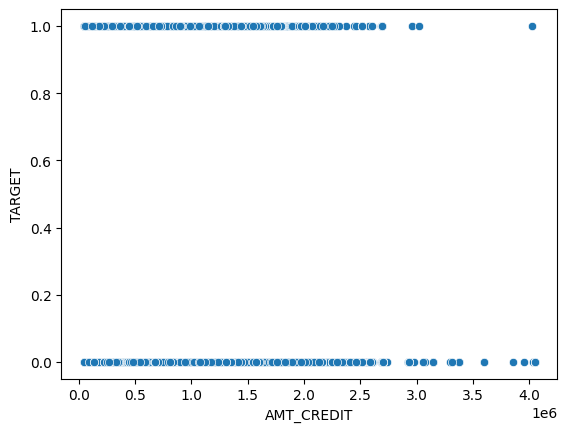

In [ ]:
sns.scatterplot(x = raw_data['AMT_CREDIT'], y = raw_data['TARGET'])

In [ ]:
raw_data['AMT_CREDIT'].corr(raw_data['TARGET'])

-0.03036928646142965

In [ ]:
raw_data['AMT_CREDIT'].mean()

599025.9997057016

In [ ]:
raw_data['AMT_CREDIT'].max()

4050000.0

In [ ]:
raw_data['AMT_CREDIT'].min()

45000.0

In [ ]:
raw_data['AMT_CREDIT'].median()

513531.0

In [ ]:
raw_data['CNT_CHILDREN'].head(25)

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     0
8     0
9     0
10    1
11    0
12    0
13    1
14    0
15    0
16    0
17    1
18    0
19    1
20    0
21    1
22    1
23    0
24    2
Name: CNT_CHILDREN, dtype: int64

<Axes: ylabel='CNT_CHILDREN'>

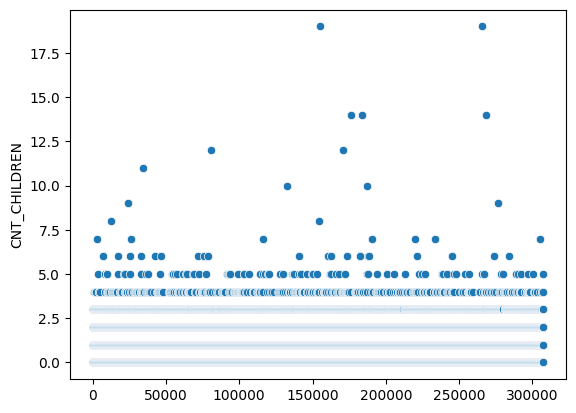

In [ ]:
sns.scatterplot(raw_data['CNT_CHILDREN'])

In [ ]:
raw_data['CNT_CHILDREN'].max()

19

In [ ]:
raw_data['CNT_CHILDREN'].min()

0

<Axes: ylabel='CNT_CHILDREN'>

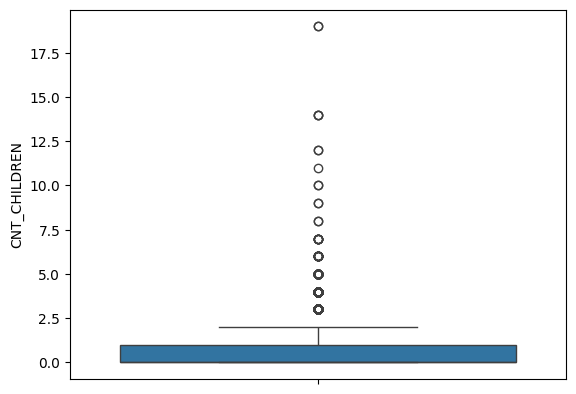

In [ ]:
sns.boxplot(raw_data['CNT_CHILDREN'])

In [ ]:
raw_data['AMT_ANNUITY'].head(30)

0     24700.5
1     35698.5
2      6750.0
3     29686.5
4     21865.5
5     27517.5
6     41301.0
7     42075.0
8     33826.5
9     20250.0
10    21177.0
11    10678.5
12     5881.5
13    28966.5
14    32778.0
15    20160.0
16    26149.5
17    13500.0
18     7875.0
19    17563.5
20    21375.0
21    37561.5
22    32521.5
23    23850.0
24    12703.5
25    11074.5
26    27076.5
27    23827.5
28    57676.5
29     9000.0
Name: AMT_ANNUITY, dtype: float64

<Axes: ylabel='AMT_ANNUITY'>

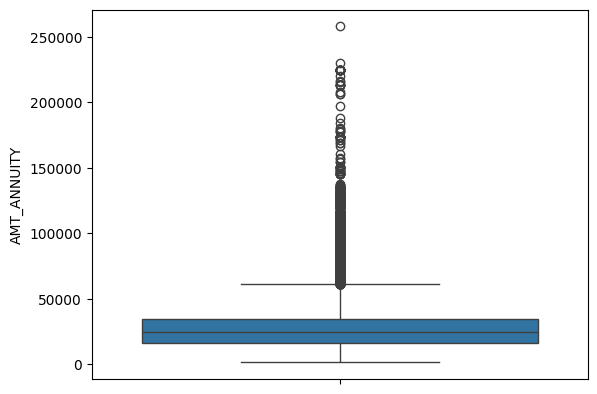

In [ ]:
sns.boxplot(raw_data['AMT_ANNUITY'])

<Axes: ylabel='AMT_ANNUITY'>

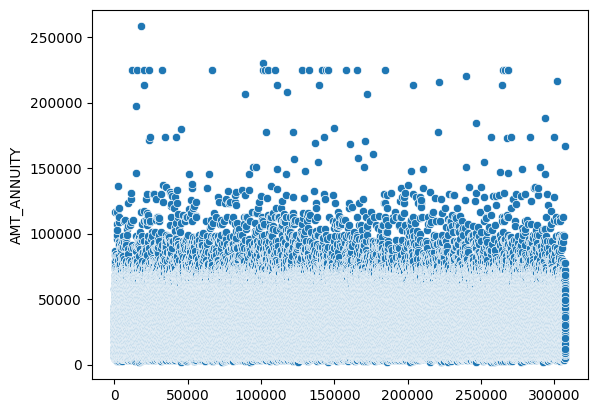

In [ ]:
sns.scatterplot(raw_data['AMT_ANNUITY'])

<Axes: xlabel='AMT_ANNUITY', ylabel='TARGET'>

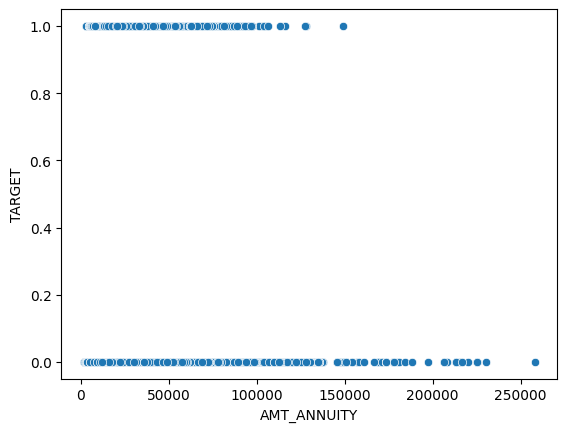

In [ ]:
sns.scatterplot(x = raw_data['AMT_ANNUITY'], y = raw_data['TARGET'])

**So, It is the EDA of some most important columns of our data**

The Columns which I am going to use are :

`TARGET`

`NAME_CONTRACT_TYPE`

`CODE_GENDER`

`FLAG_OWN_CAR`

`NAME_EDUCATION_TYPE`

`OCCUPATION_TYPE`

`CNT_FAM_MEMBERS`

`REGION_RATING_CLIENT`

`REG_REGION_NOT_WORK_REGION`

`DAYS_LAST_PHONE_CHANGE`

`AMT_INCOME_TOTAL`

`AMT_CREDIT`

In [ ]:
data = raw_data[['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'AMT_INCOME_TOTAL',
             'AMT_CREDIT', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
             'REGION_RATING_CLIENT', 'REG_REGION_NOT_WORK_REGION', 'DAYS_LAST_PHONE_CHANGE']]

In [ ]:
data

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_REGION_NOT_WORK_REGION,DAYS_LAST_PHONE_CHANGE
0,1,Cash loans,M,N,202500.0,406597.5,Secondary / secondary special,Laborers,1.0,2,0,-1134.0
1,0,Cash loans,F,N,270000.0,1293502.5,Higher education,Core staff,2.0,1,0,-828.0
2,0,Revolving loans,M,Y,67500.0,135000.0,Secondary / secondary special,Laborers,1.0,2,0,-815.0
3,0,Cash loans,F,N,135000.0,312682.5,Secondary / secondary special,Laborers,2.0,2,0,-617.0
4,0,Cash loans,M,N,121500.0,513000.0,Secondary / secondary special,Core staff,1.0,2,0,-1106.0
...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,157500.0,254700.0,Secondary / secondary special,Sales staff,1.0,1,0,-273.0
307507,0,Cash loans,F,N,72000.0,269550.0,Secondary / secondary special,NaN,1.0,2,0,0.0
307508,0,Cash loans,F,N,153000.0,677664.0,Higher education,Managers,1.0,3,0,-1909.0
307509,1,Cash loans,F,N,171000.0,370107.0,Secondary / secondary special,Laborers,2.0,2,0,-322.0


In [ ]:
data.isnull().sum()

TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
NAME_EDUCATION_TYPE               0
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
REGION_RATING_CLIENT              0
REG_REGION_NOT_WORK_REGION        0
DAYS_LAST_PHONE_CHANGE            1
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
NAME_EDUCATION_TYPE           0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
REGION_RATING_CLIENT          0
REG_REGION_NOT_WORK_REGION    0
DAYS_LAST_PHONE_CHANGE        0
dtype: int64

In [ ]:
data.shape

(211118, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211118 entries, 0 to 307510
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      211118 non-null  int64  
 1   NAME_CONTRACT_TYPE          211118 non-null  object 
 2   CODE_GENDER                 211118 non-null  object 
 3   FLAG_OWN_CAR                211118 non-null  object 
 4   AMT_INCOME_TOTAL            211118 non-null  float64
 5   AMT_CREDIT                  211118 non-null  float64
 6   NAME_EDUCATION_TYPE         211118 non-null  object 
 7   OCCUPATION_TYPE             211118 non-null  object 
 8   CNT_FAM_MEMBERS             211118 non-null  float64
 9   REGION_RATING_CLIENT        211118 non-null  int64  
 10  REG_REGION_NOT_WORK_REGION  211118 non-null  int64  
 11  DAYS_LAST_PHONE_CHANGE      211118 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 20.9+ MB


<Axes: >

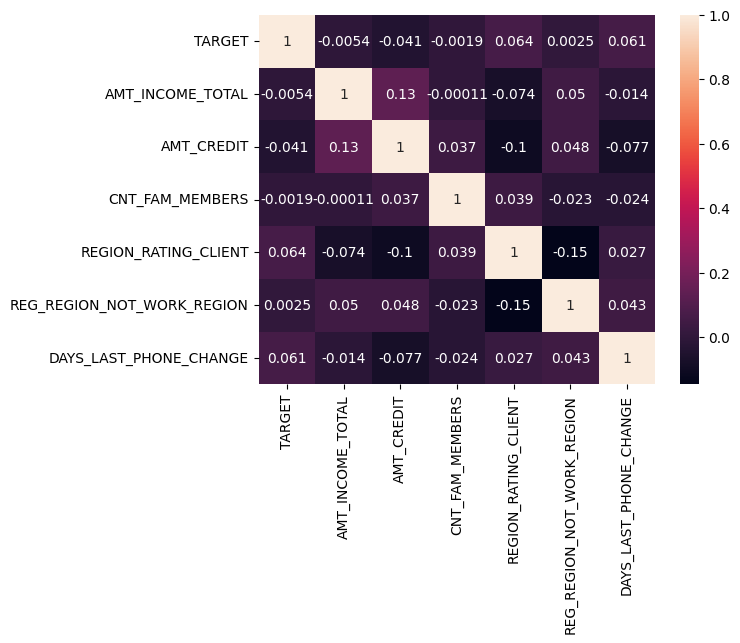

In [ ]:
numerical_columns = data.select_dtypes(include = 'number').columns
sns.heatmap(data[numerical_columns].corr(), annot = True)

In [ ]:
data[numerical_columns].corr()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_REGION_NOT_WORK_REGION,DAYS_LAST_PHONE_CHANGE
TARGET,1.000000,-0.005366,-0.040779,-0.001873,0.063884,0.002482,0.061376
AMT_INCOME_TOTAL,-0.005366,1.000000,0.134229,-0.000115,-0.074202,0.050190,-0.013758
AMT_CREDIT,-0.040779,0.134229,1.000000,0.037062,-0.102790,0.047761,-0.076811
CNT_FAM_MEMBERS,-0.001873,-0.000115,0.037062,1.000000,0.039445,-0.023004,-0.023817
REGION_RATING_CLIENT,0.063884,-0.074202,-0.102790,0.039445,1.000000,-0.146637,0.026810
REG_REGION_NOT_WORK_REGION,0.002482,0.050190,0.047761,-0.023004,-0.146637,1.000000,0.042506
DAYS_LAST_PHONE_CHANGE,0.061376,-0.013758,-0.076811,-0.023817,0.026810,0.042506,1.000000


# Training and Testing

In [ ]:
x = data.drop('TARGET', axis = 1)
y = data['TARGET']

In [ ]:
x

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_REGION_NOT_WORK_REGION,DAYS_LAST_PHONE_CHANGE
0,Cash loans,M,N,202500.0,406597.5,Secondary / secondary special,Laborers,1.0,2,0,-1134.0
1,Cash loans,F,N,270000.0,1293502.5,Higher education,Core staff,2.0,1,0,-828.0
2,Revolving loans,M,Y,67500.0,135000.0,Secondary / secondary special,Laborers,1.0,2,0,-815.0
3,Cash loans,F,N,135000.0,312682.5,Secondary / secondary special,Laborers,2.0,2,0,-617.0
4,Cash loans,M,N,121500.0,513000.0,Secondary / secondary special,Core staff,1.0,2,0,-1106.0
...,...,...,...,...,...,...,...,...,...,...,...
307504,Cash loans,F,N,153000.0,331920.0,Secondary / secondary special,Sales staff,1.0,2,0,0.0
307506,Cash loans,M,N,157500.0,254700.0,Secondary / secondary special,Sales staff,1.0,1,0,-273.0
307508,Cash loans,F,N,153000.0,677664.0,Higher education,Managers,1.0,3,0,-1909.0
307509,Cash loans,F,N,171000.0,370107.0,Secondary / secondary special,Laborers,2.0,2,0,-322.0


In [ ]:
y

0         1
1         0
2         0
3         0
4         0
         ..
307504    0
307506    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 211118, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
print(f'x_train shape : {x_train.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'x_test shape : {x_test.shape}')
print(f'y_test shape : {y_test.shape}')

x_train shape : (168894, 11)
y_train shape : (168894,)
x_test shape : (42224, 11)
y_test shape : (42224,)


# Feature Engineering

We have to do One ot Encoding with `NAME_CONTRACT_TYPE`, `CODE_GENDER` and `FLAG_OWN_CAR`

Then we have to do Ordinal Encoding on `NAME_EDUCATION_TYPE`, `OCCUPATION_TYPE`

We have to apply Standard Scaling on our `AMT_INCOME_TOTAL`, `AMT_CREDIT`, `DAYS_LAST_PHONE_CHANG`

In [ ]:
categorical_ohe_columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR']

categorical_ohe_transformer = Pipeline(steps = [
    ('ohe', OneHotEncoder(drop = 'first', handle_unknown = 'ignore'))
])

In [ ]:
categorical_oe_columns = ['NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE']

categorical_oe_transformer = Pipeline(steps = [
    ('oe', OrdinalEncoder())
])

In [ ]:
numerical_columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_LAST_PHONE_CHANGE']

numerical_transformer = Pipeline(steps = [
    ('scaler', StandardScaler())
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers = [
        ('categorical_ohe_transformer', categorical_ohe_transformer, categorical_ohe_columns),
        ('categorical_oe_transformer', categorical_oe_transformer, categorical_oe_columns),
        ('numerical_transformer', numerical_transformer, numerical_columns)
    ])

# Model Selecting

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# Logtistic Regression

In [ ]:
pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [ ]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical_ohe_transformer',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'CODE_GENDER',
                                                   'FLAG_OWN_CAR']),
                                                 ('categorical_oe_transformer',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder())]),
                                                  ['NAME_EDUCATION_TYPE',
                                                   'OCCUPATION_TYPE']),
                                                 ('numerical_transformer',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT',
                                                   'DAYS_LAST_PHONE_CHANGE'])])),
                ('classifier', LogisticRegression())])

In [ ]:
y_pred_test = pipeline.predict(x_test)
y_pred_train = pipeline.predict(x_train)

print("Accuracy score for training data is ", accuracy_score(y_train, y_pred_train))
print("Accuracy score for test data is ", accuracy_score(y_test, y_pred_test))
print("Recall score of our Model is ", recall_score(y_test, y_pred_test))
print("Precision Score of our Model is ", precision_score(y_test, y_pred_test))
print("F1 Score of our Model is ", f1_score(y_test, y_pred_test))

Accuracy score for training data is  0.9124421234620531
Accuracy score for test data is  0.9109984842743464
Recall score of our Model is  0.0
Precision Score of our Model is  0.0
F1 Score of our Model is  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     38466
           1       0.00      0.00      0.00      3758

    accuracy                           0.91     42224
   macro avg       0.46      0.50      0.48     42224
weighted avg       0.83      0.91      0.87     42224



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree Classifier

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical_ohe_transformer',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'CODE_GENDER',
                                                   'FLAG_OWN_CAR']),
                                                 ('categorical_oe_transformer',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder())]),
                                                  ['NAME_EDUCATION_TYPE',
                                                   'OCCUPATION_TYPE']),
                                                 ('numerical_transformer',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT',
                                                   'DAYS_LAST_PHONE_CHANGE'])])),
                ('classifier', DecisionTreeClassifier())])

In [ ]:
y_pred_test = pipeline.predict(x_test)
y_pred_train = pipeline.predict(x_train)

print("Accuracy score for training data is ", accuracy_score(y_train, y_pred_train))
print("Accuracy score for test data is ", accuracy_score(y_test, y_pred_test))
print("Recall score of our Model is ", recall_score(y_test, y_pred_test))
print("Precision Score of our Model is ", precision_score(y_test, y_pred_test))
print("F1 Score of our Model is ", f1_score(y_test, y_pred_test))

Accuracy score for training data is  0.99780335595107
Accuracy score for test data is  0.8323228495642289
Recall score of our Model is  0.12187333688131985
Precision Score of our Model is  0.10806984426616328
F1 Score of our Model is  0.11455727863931967


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     38466
           1       0.11      0.12      0.11      3758

    accuracy                           0.83     42224
   macro avg       0.51      0.51      0.51     42224
weighted avg       0.84      0.83      0.84     42224



# KNeighborsClassifier

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical_ohe_transformer',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'CODE_GENDER',
                                                   'FLAG_OWN_CAR']),
                                                 ('categorical_oe_transformer',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder())]),
                                                  ['NAME_EDUCATION_TYPE',
                                                   'OCCUPATION_TYPE']),
                                                 ('numerical_transformer',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT',
                                                   'DAYS_LAST_PHONE_CHANGE'])])),
                ('classifier', KNeighborsClassifier())])

In [ ]:
y_pred_test = pipeline.predict(x_test)
y_pred_train = pipeline.predict(x_train)

print("Accuracy score for training data is ", accuracy_score(y_train, y_pred_train))
print("Accuracy score for test data is ", accuracy_score(y_test, y_pred_test))
print("Recall score of our Model is ", recall_score(y_test, y_pred_test))
print("Precision Score of our Model is ", precision_score(y_test, y_pred_test))
print("F1 Score of our Model is ", f1_score(y_test, y_pred_test))

Accuracy score for training data is  0.9145381126623799
Accuracy score for test data is  0.904532967032967
Recall score of our Model is  0.016498137307078234
Precision Score of our Model is  0.1561712846347607
F1 Score of our Model is  0.029843561973525872


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     38466
           1       0.16      0.02      0.03      3758

    accuracy                           0.90     42224
   macro avg       0.53      0.50      0.49     42224
weighted avg       0.84      0.90      0.87     42224



# Random Forest Classifier

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators = 800, random_state = 42, max_depth = 3))
])

pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical_ohe_transformer',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'CODE_GENDER',
                                                   'FLAG_OWN_CAR']),
                                                 ('categorical_oe_transformer',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder())]),
                                                  ['NAME_EDUCATION_TYPE',
                                                   'OCCUPATION_TYPE']),
                                                 ('numerical_transformer',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT',
                                                   'DAYS_LAST_PHONE_CHANGE'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=3, n_estimators=800,
                                        random_state=42))])

In [ ]:
y_pred_test = pipeline.predict(x_test)
y_pred_train = pipeline.predict(x_train)

print("Accuracy score for training data is ", accuracy_score(y_train, y_pred_train))
print("Accuracy score for test data is ", accuracy_score(y_test, y_pred_test))
print("Recall score of our Model is ", recall_score(y_test, y_pred_test))
print("Precision Score of our Model is ", precision_score(y_test, y_pred_test))
print("F1 Score of our Model is ", f1_score(y_test, y_pred_test))

Accuracy score for training data is  0.9124362025886059
Accuracy score for test data is  0.9109984842743464
Recall score of our Model is  0.0
Precision Score of our Model is  0.0
F1 Score of our Model is  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     38466
           1       0.00      0.00      0.00      3758

    accuracy                           0.91     42224
   macro avg       0.46      0.50      0.48     42224
weighted avg       0.83      0.91      0.87     42224



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Gradient Boosting Classifier

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators = 500, random_state = 42, max_depth = 3))
])

pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical_ohe_transformer',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'CODE_GENDER',
                                                   'FLAG_OWN_CAR']),
                                                 ('categorical_oe_transformer',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder())]),
                                                  ['NAME_EDUCATION_TYPE',
                                                   'OCCUPATION_TYPE']),
                                                 ('numerical_transformer',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT',
                                                   'DAYS_LAST_PHONE_CHANGE'])])),
                ('classifier',
                 GradientBoostingClassifier(n_estimators=500,
                                            random_state=42))])

In [ ]:
y_pred_test = pipeline.predict(x_test)
y_pred_train = pipeline.predict(x_train)

print("Accuracy score for training data is ", accuracy_score(y_train, y_pred_train))
print("Accuracy score for test data is ", accuracy_score(y_test, y_pred_test))
print("Recall score of our Model is ", recall_score(y_test, y_pred_test))
print("Precision Score of our Model is ", precision_score(y_test, y_pred_test))
print("F1 Score of our Model is ", f1_score(y_test, y_pred_test))

Accuracy score for training data is  0.9125842244247871
Accuracy score for test data is  0.9109274346343312
Recall score of our Model is  0.0005321979776476849
Precision Score of our Model is  0.2857142857142857
F1 Score of our Model is  0.0010624169986719785


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     38466
           1       0.29      0.00      0.00      3758

    accuracy                           0.91     42224
   macro avg       0.60      0.50      0.48     42224
weighted avg       0.86      0.91      0.87     42224



# XGBoostClassifier

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(n_estimators = 1500, random_state = 42, max_depth = 3))
])

pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical_ohe_transformer',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'CODE_GENDER',
                                                   'FLAG_OWN_CAR']),
                                                 ('categorical_oe_transformer',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder())]),
                                                  ['NAME_EDUCATION_TYPE',
                                                   'OCCUPATION_TYPE']),
                                                 ('numeric...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=1500, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [ ]:
y_pred_test = pipeline.predict(x_test)
y_pred_train = pipeline.predict(x_train)

print("Accuracy score for training data is ", accuracy_score(y_train, y_pred_train))
print("Accuracy score for test data is ", accuracy_score(y_test, y_pred_test))
print("Recall score of our Model is ", recall_score(y_test, y_pred_test))
print("Precision Score of our Model is ", precision_score(y_test, y_pred_test))
print("F1 Score of our Model is ", f1_score(y_test, y_pred_test))

Accuracy score for training data is  0.9127500088813102
Accuracy score for test data is  0.910856384994316
Recall score of our Model is  0.0007982969664715274
Precision Score of our Model is  0.25
F1 Score of our Model is  0.0015915119363395223


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     38466
           1       0.25      0.00      0.00      3758

    accuracy                           0.91     42224
   macro avg       0.58      0.50      0.48     42224
weighted avg       0.85      0.91      0.87     42224



# Adaboost Classifier

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(n_estimators = 500, random_state = 42))
])

pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical_ohe_transformer',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'CODE_GENDER',
                                                   'FLAG_OWN_CAR']),
                                                 ('categorical_oe_transformer',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder())]),
                                                  ['NAME_EDUCATION_TYPE',
                                                   'OCCUPATION_TYPE']),
                                                 ('numerical_transformer',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT',
                                                   'DAYS_LAST_PHONE_CHANGE'])])),
                ('classifier',
                 AdaBoostClassifier(n_estimators=500, random_state=42))])

In [ ]:
y_pred_test = pipeline.predict(x_test)
y_pred_train = pipeline.predict(x_train)

print("Accuracy score for training data is ", accuracy_score(y_train, y_pred_train))
print("Accuracy score for test data is ", accuracy_score(y_test, y_pred_test))
print("Recall score of our Model is ", recall_score(y_test, y_pred_test))
print("Precision Score of our Model is ", precision_score(y_test, y_pred_test))
print("F1 Score of our Model is ", f1_score(y_test, y_pred_test))

Accuracy score for training data is  0.9124717278292894
Accuracy score for test data is  0.9109274346343312
Recall score of our Model is  0.0
Precision Score of our Model is  0.0
F1 Score of our Model is  0.0


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     38466
           1       0.00      0.00      0.00      3758

    accuracy                           0.91     42224
   macro avg       0.46      0.50      0.48     42224
weighted avg       0.83      0.91      0.87     42224



# Using SMOTE

Our data is **Imbalanced** as you can see in target column there are much more non-froud samples than fraud! So in all models that I used above did not learn fraud samples and you can see recall is almost 0 for "minority class". In order to tackle with this issue I try to use SMOTE algorithm to increase the samples of minority class.

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# SMOTE with Logistic Regression

In [ ]:
oversampling = SMOTE()

pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('oversampling', oversampling),
    ('classifier', LogisticRegression())
])

pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical_ohe_transformer',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'CODE_GENDER',
                                                   'FLAG_OWN_CAR']),
                                                 ('categorical_oe_transformer',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder())]),
                                                  ['NAME_EDUCATION_TYPE',
                                                   'OCCUPATION_TYPE']),
                                                 ('numerical_transformer',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT',
                                                   'DAYS_LAST_PHONE_CHANGE'])])),
                ('oversampling', SMOTE()),
                ('classifier', LogisticRegression())])

In [ ]:
y_pred_test = pipeline.predict(x_test)
y_pred_train = pipeline.predict(x_train)

print("Accuracy score for training data is ", accuracy_score(y_train, y_pred_train))
print("Accuracy score for test data is ", accuracy_score(y_test, y_pred_test))
print("Recall score of our Model is ", recall_score(y_test, y_pred_test))
print("Precision Score of our Model is ", precision_score(y_test, y_pred_test))
print("F1 Score of our Model is ", f1_score(y_test, y_pred_test))

Accuracy score for training data is  0.5681729368716473
Accuracy score for test data is  0.5660287987874195
Recall score of our Model is  0.6109632783395423
Precision Score of our Model is  0.11984549535442113
F1 Score of our Model is  0.20038401117123408


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.56      0.70     38466
           1       0.12      0.61      0.20      3758

    accuracy                           0.57     42224
   macro avg       0.53      0.59      0.45     42224
weighted avg       0.86      0.57      0.66     42224



# SMOTE with Decision Tree Classifier

In [ ]:
oversampling = SMOTE()

pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('oversampling', oversampling),
    ('classifier', DecisionTreeClassifier())
])

pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical_ohe_transformer',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'CODE_GENDER',
                                                   'FLAG_OWN_CAR']),
                                                 ('categorical_oe_transformer',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder())]),
                                                  ['NAME_EDUCATION_TYPE',
                                                   'OCCUPATION_TYPE']),
                                                 ('numerical_transformer',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT',
                                                   'DAYS_LAST_PHONE_CHANGE'])])),
                ('oversampling', SMOTE()),
                ('classifier', DecisionTreeClassifier())])

In [ ]:
y_pred_test = pipeline.predict(x_test)
y_pred_train = pipeline.predict(x_train)

print("Accuracy score for training data is ", accuracy_score(y_train, y_pred_train))
print("Accuracy score for test data is ", accuracy_score(y_test, y_pred_test))
print("Recall score of our Model is ", recall_score(y_test, y_pred_test))
print("Precision Score of our Model is ", precision_score(y_test, y_pred_test))
print("F1 Score of our Model is ", f1_score(y_test, y_pred_test))

Accuracy score for training data is  0.9977559889634919
Accuracy score for test data is  0.7995926487305798
Recall score of our Model is  0.160457690260777
Precision Score of our Model is  0.10203045685279188
F1 Score of our Model is  0.12474141497724452


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89     38466
           1       0.10      0.16      0.12      3758

    accuracy                           0.80     42224
   macro avg       0.51      0.51      0.51     42224
weighted avg       0.84      0.80      0.82     42224



# SMOTE with KNeighborsClassifier

In [ ]:
oversampling = SMOTE()

pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('oversampling', oversampling),
    ('classifier', KNeighborsClassifier())
])

pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical_ohe_transformer',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'CODE_GENDER',
                                                   'FLAG_OWN_CAR']),
                                                 ('categorical_oe_transformer',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder())]),
                                                  ['NAME_EDUCATION_TYPE',
                                                   'OCCUPATION_TYPE']),
                                                 ('numerical_transformer',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT',
                                                   'DAYS_LAST_PHONE_CHANGE'])])),
                ('oversampling', SMOTE()),
                ('classifier', KNeighborsClassifier())])

In [ ]:
y_pred_test = pipeline.predict(x_test)
y_pred_train = pipeline.predict(x_train)

print("Accuracy score for training data is ", accuracy_score(y_train, y_pred_train))
print("Accuracy score for test data is ", accuracy_score(y_test, y_pred_test))
print("Recall score of our Model is ", recall_score(y_test, y_pred_test))
print("Precision Score of our Model is ", precision_score(y_test, y_pred_test))
print("F1 Score of our Model is ", f1_score(y_test, y_pred_test))

Accuracy score for training data is  0.8084419813610904
Accuracy score for test data is  0.6796608563849943
Recall score of our Model is  0.3552421500798297
Precision Score of our Model is  0.10733236854799807
F1 Score of our Model is  0.16485551988145225


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80     38466
           1       0.11      0.36      0.16      3758

    accuracy                           0.68     42224
   macro avg       0.51      0.53      0.48     42224
weighted avg       0.85      0.68      0.75     42224



# SMOTE with Random Forest Classifier

In [ ]:
oversampling = SMOTE()

pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('oversampling', oversampling),
    ('classifier', RandomForestClassifier(n_estimators = 800, random_state = 42, max_depth = 3))
])

pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical_ohe_transformer',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'CODE_GENDER',
                                                   'FLAG_OWN_CAR']),
                                                 ('categorical_oe_transformer',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder())]),
                                                  ['NAME_EDUCATION_TYPE',
                                                   'OCCUPATION_TYPE']),
                                                 ('numerical_transformer',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT',
                                                   'DAYS_LAST_PHONE_CHANGE'])])),
                ('oversampling', SMOTE()),
                ('classifier',
                 RandomForestClassifier(max_depth=3, n_estimators=800,
                                        random_state=42))])

In [ ]:
y_pred_test = pipeline.predict(x_test)
y_pred_train = pipeline.predict(x_train)

print("Accuracy score for training data is ", accuracy_score(y_train, y_pred_train))
print("Accuracy score for test data is ", accuracy_score(y_test, y_pred_test))
print("Recall score of our Model is ", recall_score(y_test, y_pred_test))
print("Precision Score of our Model is ", precision_score(y_test, y_pred_test))
print("F1 Score of our Model is ", f1_score(y_test, y_pred_test))

Accuracy score for training data is  0.5820337016116618
Accuracy score for test data is  0.5838859416445623
Recall score of our Model is  0.5870143693453965
Precision Score of our Model is  0.12104916593503073
F1 Score of our Model is  0.20070967154944958


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.58      0.72     38466
           1       0.12      0.59      0.20      3758

    accuracy                           0.58     42224
   macro avg       0.53      0.59      0.46     42224
weighted avg       0.86      0.58      0.67     42224



# SMOTE with Gradient Boosting Classifier

In [ ]:
oversampling = SMOTE()

pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('oversampling', oversampling),
    ('classifier', GradientBoostingClassifier(n_estimators = 500, random_state = 42, max_depth = 3))
])

pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical_ohe_transformer',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'CODE_GENDER',
                                                   'FLAG_OWN_CAR']),
                                                 ('categorical_oe_transformer',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder())]),
                                                  ['NAME_EDUCATION_TYPE',
                                                   'OCCUPATION_TYPE']),
                                                 ('numerical_transformer',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT',
                                                   'DAYS_LAST_PHONE_CHANGE'])])),
                ('oversampling', SMOTE()),
                ('classifier',
                 GradientBoostingClassifier(n_estimators=500,
                                            random_state=42))])

In [ ]:
y_pred_test = pipeline.predict(x_test)
y_pred_train = pipeline.predict(x_train)

print("Accuracy score for training data is ", accuracy_score(y_train, y_pred_train))
print("Accuracy score for test data is ", accuracy_score(y_test, y_pred_test))
print("Recall score of our Model is ", recall_score(y_test, y_pred_test))
print("Precision Score of our Model is ", precision_score(y_test, y_pred_test))
print("F1 Score of our Model is ", f1_score(y_test, y_pred_test))

Accuracy score for training data is  0.8565727616137933
Accuracy score for test data is  0.8536614247821145
Recall score of our Model is  0.0989888238424694
Precision Score of our Model is  0.11753554502369669
F1 Score of our Model is  0.10746786075400838


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     38466
           1       0.12      0.10      0.11      3758

    accuracy                           0.85     42224
   macro avg       0.52      0.51      0.51     42224
weighted avg       0.84      0.85      0.85     42224



# SMOTE with XGBoostClassifier

In [ ]:
oversampling = SMOTE()

pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('oversampling', oversampling),
    ('classifier', XGBClassifier(n_estimators = 1500, random_state = 42, max_depth = 3))
])

pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical_ohe_transformer',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'CODE_GENDER',
                                                   'FLAG_OWN_CAR']),
                                                 ('categorical_oe_transformer',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder())]),
                                                  ['NAME_EDUCATION_TYPE',
                                                   'OCCUPATION_TYPE']),
                                                 ('numeric...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=1500, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [ ]:
y_pred_test = pipeline.predict(x_test)
y_pred_train = pipeline.predict(x_train)

print("Accuracy score for training data is ", accuracy_score(y_train, y_pred_train))
print("Accuracy score for test data is ", accuracy_score(y_test, y_pred_test))
print("Recall score of our Model is ", recall_score(y_test, y_pred_test))
print("Precision Score of our Model is ", precision_score(y_test, y_pred_test))
print("F1 Score of our Model is ", f1_score(y_test, y_pred_test))

Accuracy score for training data is  0.8364062666524565
Accuracy score for test data is  0.8249336870026526
Recall score of our Model is  0.1609898882384247
Precision Score of our Model is  0.12489677952105697
F1 Score of our Model is  0.14066496163682865


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90     38466
           1       0.12      0.16      0.14      3758

    accuracy                           0.82     42224
   macro avg       0.52      0.53      0.52     42224
weighted avg       0.85      0.82      0.83     42224



# SMOTE with Adaboost Classifier

In [ ]:
oversampling = SMOTE()

pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('oversampling', oversampling),
    ('classifier', AdaBoostClassifier(n_estimators = 500, random_state = 42))
])

pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical_ohe_transformer',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'CODE_GENDER',
                                                   'FLAG_OWN_CAR']),
                                                 ('categorical_oe_transformer',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder())]),
                                                  ['NAME_EDUCATION_TYPE',
                                                   'OCCUPATION_TYPE']),
                                                 ('numerical_transformer',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT',
                                                   'DAYS_LAST_PHONE_CHANGE'])])),
                ('oversampling', SMOTE()),
                ('classifier',
                 AdaBoostClassifier(n_estimators=500, random_state=42))])

In [ ]:
y_pred_test = pipeline.predict(x_test)
y_pred_train = pipeline.predict(x_train)

print("Accuracy score for training data is ", accuracy_score(y_train, y_pred_train))
print("Accuracy score for test data is ", accuracy_score(y_test, y_pred_test))
print("Recall score of our Model is ", recall_score(y_test, y_pred_test))
print("Precision Score of our Model is ", precision_score(y_test, y_pred_test))
print("F1 Score of our Model is ", f1_score(y_test, y_pred_test))

Accuracy score for training data is  0.7721707106232312
Accuracy score for test data is  0.7673834785903751
Recall score of our Model is  0.2197977647684939
Precision Score of our Model is  0.10705028512182478
F1 Score of our Model is  0.1439776886874673


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87     38466
           1       0.11      0.22      0.14      3758

    accuracy                           0.77     42224
   macro avg       0.51      0.52      0.50     42224
weighted avg       0.84      0.77      0.80     42224



# Conclusion

From the above, it can be seen on the actual imbalanced dataset, all classifier models were not able to generalize well on the **minority class** compared to the **majority class**. As a result, most of the negative class samples were correctly classified. Due to this, there was less **FP** compared to more **FN**. After oversampling, a clear surge in **Recall** is seen on the test data. There is a decrease in overall accurracy, but by achieving a much recall which satisfies the objective of this binary classification problem. above all the models I think Logistic Regression is most generalized and works well with detecting Positive class samples, because our main goal in this binary classification problem is to detect fraud samples! To understand this better, a comparative barplot is shown below for all models can help us